In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

import random

In [30]:
df = pd.read_csv(r'D:\ML Assignment 3\df_out.csv', index_col = 0)

In [31]:
def classifying1(x):
    if x > 1: 
        return 1
    else:
        return 0

In [32]:
from sklearn import model_selection
from sklearn.feature_selection import SelectPercentile, f_classif

In [33]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying1)
df.corrwith(df["2015 PRICE VAR [%]"]).sort_values(ascending = False)

2015 PRICE VAR [%]                 1.000000
Class                              0.652077
classes                            0.651469
EPS Diluted                        0.118955
EPS                                0.117757
                                     ...   
cashPerShare                      -0.052292
Cash per Share                    -0.052292
Shareholders Equity per Share     -0.056133
Property, Plant & Equipment Net   -0.059593
Book Value per Share              -0.097445
Length: 64, dtype: float64

In [34]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])
nparray = df.to_numpy()
scores = ["recall",'precision','accuracy','f1']

In [35]:
features = nparray[:,0:-1]
label = nparray[:,-1]

X = features
y = label

features.shape

(3788, 61)

In [36]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

# SVC Linear

In [37]:
for i in range (0,3):  
    for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            param_grid = {'C': [0.1,0.5,0.7, 0.9,1,2,10,15,20], 'dual': [False]}
            SVC_GS = GridSearchCV(estimator = LinearSVC(),param_grid=param_grid, scoring = score , cv = 30,refit=True,verbose=1, n_jobs=-1)
            SVC_GS.fit(X_train,y_train)   
            y_pred = SVC_GS.predict(X_test)
            resultsSVM1 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsSVM1.insert(0,'SVMLinear RUN ' + str(i+1) + " With Scoring method " + score)
            resultsSVM1.pop(4)
            resultsSVM1.insert(4, SVC_GS.score(X_train, y_train))
            resultsSVM1.insert(5, SVC_GS.score(X_test, y_test))


            SVM1_dataframe = pd.DataFrame([resultsSVM1], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM1_dataframe])
            print("The best estimator for RUN " + str(i+1) +  " With Scoring method " + score + " : "  + str(SVC_GS.best_estimator_))
            print("The Confusion matrix for RUN " + str(i+1) + " With Scoring method " + score + " : " + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))
    

Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   21.2s finished


The best estimator for RUN 1 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 With Scoring method recall :  is 

[[[ 39 279]
  [ 54 386]]

 [[386  54]
  [279  39]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   20.4s finished


The best estimator for RUN 1 With Scoring method precision : LinearSVC(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 With Scoring method precision :  is 

[[[ 77 235]
  [ 80 366]]

 [[366  80]
  [235  77]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 With Scoring method accuracy : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 With Scoring method accuracy :  is 

[[[ 70 245]
  [ 82 361]]

 [[361  82]
  [245  70]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   17.8s finished


The best estimator for RUN 1 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 With Scoring method f1 :  is 

[[[ 79 259]
  [ 61 359]]

 [[359  61]
  [259  79]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   17.2s finished


The best estimator for RUN 2 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 With Scoring method recall :  is 

[[[ 62 241]
  [ 90 365]]

 [[365  90]
  [241  62]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   16.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 With Scoring method precision :  is 

[[[ 62 285]
  [ 59 352]]

 [[352  59]
  [285  62]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   19.6s finished


The best estimator for RUN 2 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 With Scoring method accuracy :  is 

[[[ 62 237]
  [ 77 382]]

 [[382  77]
  [237  62]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   17.1s finished


The best estimator for RUN 2 With Scoring method f1 : LinearSVC(C=15, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 With Scoring method f1 :  is 

[[[ 56 264]
  [ 80 358]]

 [[358  80]
  [264  56]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   18.5s finished


The best estimator for RUN 3 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 With Scoring method recall :  is 

[[[ 57 234]
  [ 77 390]]

 [[390  77]
  [234  57]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   16.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 With Scoring method precision : LinearSVC(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 With Scoring method precision :  is 

[[[ 48 290]
  [ 59 361]]

 [[361  59]
  [290  48]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   16.3s finished


The best estimator for RUN 3 With Scoring method accuracy : LinearSVC(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 With Scoring method accuracy :  is 

[[[ 91 225]
  [ 91 351]]

 [[351  91]
  [225  91]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   18.4s finished


The best estimator for RUN 3 With Scoring method f1 : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 With Scoring method f1 :  is 

[[[ 53 284]
  [ 49 372]]

 [[372  49]
  [284  53]]]
None


In [38]:
print('The parameters combination that would give best accuracy is : ')
print(SVC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 0.7, 'dual': False}


In [39]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 With Scoring method recall,0.499903,0.499957,0.444212,0.170040,0.122642
SVMLinear RUN 1 With Scoring method precision,0.549715,0.533711,0.513749,0.504979,0.490446
SVMLinear RUN 1 With Scoring method accuracy,0.528118,0.518560,0.494030,0.587789,0.568602
SVMLinear RUN 1 With Scoring method f1,0.572596,0.544245,0.511129,0.300727,0.330544
SVMLinear RUN 2 With Scoring method recall,0.505102,0.503409,0.480279,0.275200,0.204620
SVMLinear RUN 2 With Scoring method precision,0.532493,0.517561,0.468356,0.434608,0.512397
SVMLinear RUN 2 With Scoring method accuracy,0.531584,0.519801,0.495912,0.577228,0.585752
SVMLinear RUN 2 With Scoring method f1,0.493664,0.496176,0.460543,0.294795,0.245614
SVMLinear RUN 3 With Scoring method recall,0.525187,0.515497,0.491588,0.240887,0.195876


# SVM Non-Linear     

In [40]:
for i in range (0,3):   
    for score in scores:
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)    
        param_grid = {'C': [0.5,0.9,1,2,10,15,20], 'degree' : [2,3] , 'gamma' : ['scale'], 'kernel' : ['poly'], 'coef0': [1,2]}
        SVM_NonLinear_GS = GridSearchCV(SVC(), scoring = score,param_grid = param_grid , cv = 10,refit=True,verbose=1, n_jobs=-1)
        SVM_NonLinear_GS.get_params().keys()
        SVM_NonLinear_GS.fit(X_train,y_train)   
        y_pred = SVM_NonLinear_GS.predict(X_test)
        resultsSVM2 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
        resultsSVM2.insert(0,'SVM NON Linear RUN ' + str(i+1) +  " With Scoring method " + score )
        resultsSVM2.pop(4)
        resultsSVM2.insert(4, SVM_NonLinear_GS.score(X_train, y_train))
        resultsSVM2.insert(5, SVM_NonLinear_GS.score(X_test, y_test))


        SVM2_dataframe = pd.DataFrame([resultsSVM2], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

        resultsDF = resultsDF.append([SVM2_dataframe])
        print("The best estimator for RUN " + str(i+1) +  " With Scoring method " + score  + str(SVM_NonLinear_GS.best_estimator_))
        print("The Confusion matrix for RUN" + str(i+1) + " With Scoring method " + score + " is \n")
        print(print(multilabel_confusion_matrix(y_test, y_pred)))

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   32.4s finished


The best estimator for RUN 1 With Scoring method recallSVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 With Scoring method recall is 

[[[ 44 279]
  [ 32 403]]

 [[403  32]
  [279  44]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   32.5s finished


The best estimator for RUN 1 With Scoring method precisionSVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 With Scoring method precision is 

[[[ 38 273]
  [ 29 418]]

 [[418  29]
  [273  38]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   37.0s finished


The best estimator for RUN 1 With Scoring method accuracySVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 With Scoring method accuracy is 

[[[ 32 282]
  [ 24 420]]

 [[420  24]
  [282  32]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   37.6s finished


The best estimator for RUN 1 With Scoring method f1SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN1 With Scoring method f1 is 

[[[ 40 262]
  [ 34 422]]

 [[422  34]
  [262  40]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   33.8s finished


The best estimator for RUN 2 With Scoring method recallSVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN2 With Scoring method recall is 

[[[ 46 260]
  [ 40 412]]

 [[412  40]
  [260  46]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   33.7s finished


The best estimator for RUN 2 With Scoring method precisionSVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN2 With Scoring method precision is 

[[[ 27 272]
  [ 25 434]]

 [[434  25]
  [272  27]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   32.5s finished


The best estimator for RUN 2 With Scoring method accuracySVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN2 With Scoring method accuracy is 

[[[ 30 288]
  [ 23 417]]

 [[417  23]
  [288  30]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   33.3s finished


The best estimator for RUN 2 With Scoring method f1SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN2 With Scoring method f1 is 

[[[ 35 276]
  [ 21 426]]

 [[426  21]
  [276  35]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   34.3s finished


The best estimator for RUN 3 With Scoring method recallSVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN3 With Scoring method recall is 

[[[ 41 261]
  [ 19 437]]

 [[437  19]
  [261  41]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   35.5s finished


The best estimator for RUN 3 With Scoring method precisionSVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN3 With Scoring method precision is 

[[[ 37 282]
  [ 21 418]]

 [[418  21]
  [282  37]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   33.4s finished


The best estimator for RUN 3 With Scoring method accuracySVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN3 With Scoring method accuracy is 

[[[ 39 257]
  [ 30 432]]

 [[432  30]
  [257  39]]]
None
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   35.5s finished


The best estimator for RUN 3 With Scoring method f1SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=2,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN3 With Scoring method f1 is 

[[[ 43 280]
  [ 27 408]]

 [[408  27]
  [280  43]]]
None


In [41]:
print('The parameters combination that would give best accuracy is : ')
print(SVM_NonLinear_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 20, 'coef0': 2, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [42]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 With Scoring method recall,0.499903,0.499957,0.444212,0.170040,0.122642
SVMLinear RUN 1 With Scoring method precision,0.549715,0.533711,0.513749,0.504979,0.490446
SVMLinear RUN 1 With Scoring method accuracy,0.528118,0.518560,0.494030,0.587789,0.568602
SVMLinear RUN 1 With Scoring method f1,0.572596,0.544245,0.511129,0.300727,0.330544
SVMLinear RUN 2 With Scoring method recall,0.505102,0.503409,0.480279,0.275200,0.204620
SVMLinear RUN 2 With Scoring method precision,0.532493,0.517561,0.468356,0.434608,0.512397
SVMLinear RUN 2 With Scoring method accuracy,0.531584,0.519801,0.495912,0.577228,0.585752
SVMLinear RUN 2 With Scoring method f1,0.493664,0.496176,0.460543,0.294795,0.245614
SVMLinear RUN 3 With Scoring method recall,0.525187,0.515497,0.491588,0.240887,0.195876


# KNN

In [43]:
for i in range (0,3):
    for score in scores:
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
        print(X_train)   
        param_grid = {'n_neighbors': [3,5,10,15,50], 'n_jobs' : [-1],}
        KNN_GS = GridSearchCV(KNeighborsClassifier(), scoring = score,param_grid = param_grid , cv = 30,refit=True,verbose=1, n_jobs=-1)
        KNN_GS.fit(X_train,y_train)   
        y_pred = KNN_GS.predict(X_test)
        resultsKNN = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
        resultsKNN.insert(0,'KNN RUN ' + str(i+1) +  " With Scoring method " + score )
        resultsKNN.pop(4)
        resultsKNN.insert(4, KNN_GS.score(X_train, y_train))
        resultsKNN.insert(5, KNN_GS.score(X_test, y_test))


        KNN_dataframe = pd.DataFrame([resultsKNN], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

        resultsDF = resultsDF.append([KNN_dataframe])
        print("The best estimator for RUN " + str(i+1) + " With Scoring method " + score  + str(KNN_GS.best_estimator_))
        print("The Confusion matrix for RUN" + str(i+1) +" With Scoring method " + score  + " is \n")
        print(print(multilabel_confusion_matrix(y_test, y_pred)))

[[ 1.02264000e+10  4.18540000e+09  2.37030000e+09 ...  8.21000000e-02
   6.48000000e-02  1.17100000e-01]
 [ 3.51240000e+10  1.23340000e+10  1.03600000e+09 ... -4.52400000e-01
  -3.50500000e-01 -4.44200000e-01]
 [ 1.36700000e+09  1.98000000e+08  1.15000000e+08 ...  1.48880177e-01
   1.83542634e-01  1.67757663e-01]
 ...
 [ 1.57925700e+09  1.37528800e+09  1.81316000e+08 ...  2.24570800e+00
  -4.53500000e-01 -1.10400000e-01]
 [ 7.68400000e+07  2.42230000e+07  2.32040000e+07 ...  1.43400000e+00
   3.50000000e-01 -3.59000000e-02]
 [ 7.77863300e+09  5.03202000e+08  1.06823000e+08 ...  2.67900000e-01
   4.22656400e+00  3.56366600e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.4s finished


The best estimator for RUN 1 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 With Scoring method recall is 

[[[143 179]
  [143 293]]

 [[293 143]
  [179 143]]]
None
[[ 5.90000000e+07  5.90000000e+07  1.36000000e+08 ...  1.25357367e-01
   1.27008954e-01  5.52643807e-02]
 [ 1.79800000e+06  0.00000000e+00  6.93430000e+07 ... -5.79278000e-01
  -1.15300000e+00 -1.15010000e+00]
 [ 2.28260000e+10  5.53100000e+09  2.35200000e+09 ...  6.90000000e-02
   7.73000000e-02  8.20000000e-02]
 ...
 [ 1.26600500e+09  1.26600500e+09  8.38631000e+08 ...  1.24200000e-01
   1.25200000e-01  4.20200000e-01]
 [ 2.19063300e+09  4.68795000e+08  2.61340000e+08 ...  1.36800000e-01
   1.08000000e-01  6.86000000e-02]
 [ 7.40055000e+08  4.04057000e+08  3.23492000e+08 ... -2.03000000e-02
  -6.15000000e-02 -6.59000000e-02]]
Fitti

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 1 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 With Scoring method precision is 

[[[ 88 216]
  [ 60 394]]

 [[394  60]
  [216  88]]]
None
[[ 0.00000000e+00  0.00000000e+00  9.54614695e+05 ...  2.52390984e-01
  -3.68765490e-01 -3.95322112e-01]
 [ 6.78400000e+09  1.25300000e+09  5.23000000e+08 ... -5.86000000e-02
  -2.70300000e-01 -1.25800000e-01]
 [ 5.10690000e+07  1.25890000e+07  1.06460000e+07 ... -5.90000000e-03
   3.36100000e-01  1.31860000e+00]
 ...
 [ 1.92310000e+07  1.92310000e+07  1.36320000e+07 ...  3.94500000e-01
  -2.96200000e-01 -2.77100000e-01]
 [ 9.93690000e+07  9.93690000e+07  5.39470000e+07 ...  1.05800000e+00
   9.13000000e-01  9.38800000e-01]
 [ 2.65500600e+09  9.80240000e+08  5.54882000e+08 ... -1.03000000e-02
  -4.56000000e-02 -4.71000000e-02]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 1 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 With Scoring method accuracy is 

[[[ 96 192]
  [ 78 392]]

 [[392  78]
  [192  96]]]
None
[[ 2.59930000e+07  2.59930000e+07  1.64960000e+07 ...  4.48000000e-02
   7.17000000e-02  7.17000000e-02]
 [ 1.16150000e+09  5.13800000e+08  2.04200000e+08 ...  3.30000000e-03
   1.68050000e+00  2.65400000e-01]
 [ 2.55453590e+10  1.53749500e+10  6.62394173e+09 ...  4.44000000e-02
   1.98200000e-01  1.99900000e-01]
 ...
 [ 4.18109500e+09  2.57275900e+09  1.12388200e+09 ...  6.99000000e-02
   3.06500000e-01  7.19000000e-02]
 [ 8.75595200e+09  9.66211000e+08  3.59401000e+08 ...  3.43600000e-01
  -1.17500000e-01 -1.71300000e-01]
 [ 4.99261000e+08  2.87037000e+08  2.33634000e+08 ... -1.27000000e-01
  -2.84400000e-01 -3.21900000e-01]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 1 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN1 With Scoring method f1 is 

[[[140 166]
  [138 314]]

 [[314 138]
  [166 140]]]
None
[[ 1.39350000e+07  1.39350000e+07  9.35600000e+06 ... -5.22000000e-02
  -2.84700000e-01 -2.84700000e-01]
 [ 8.45569000e+08  6.32590000e+08  5.32410000e+08 ...  8.46000000e-02
   4.69600000e-01  4.84700000e-01]
 [ 2.98146000e+08  2.98146000e+08  1.17285000e+08 ...  8.11000000e-02
   9.22000000e-02  1.03800000e-01]
 ...
 [ 1.74058000e+08  1.66584000e+08  3.58590000e+07 ...  5.16000000e-02
  -2.43000000e-02  2.11000000e-02]
 [ 7.23820000e+07  4.72300000e+07  1.52740000e+07 ...  2.49000000e-01
   3.11800000e-01  3.09300000e-01]
 [ 1.17030000e+10  9.70400000e+09  9.14000000e+08 ...  1.48880177e-01
   1.83542634e-01  1.67757663e-01]]
Fitting 30 fo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 2 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 With Scoring method recall is 

[[[146 172]
  [122 318]]

 [[318 122]
  [172 146]]]
None
[[ 7.84025500e+09  1.22201600e+09  8.57297000e+08 ...  1.40900000e-01
   1.74400000e-01  1.74400000e-01]
 [ 3.53318120e+07  2.22974980e+07  2.57998370e+07 ...  1.80500000e-01
   3.97100000e-01  3.04500000e-01]
 [ 1.35601000e+08  1.19577000e+08  4.99800000e+06 ...  3.15800000e-01
  -3.47000000e-02  7.86900000e-01]
 ...
 [ 7.21609010e+09  5.42300885e+09  1.35406275e+09 ...  4.40000000e-02
   3.57000000e-02  2.81000000e-02]
 [ 1.74444190e+07  9.92279300e+06  1.28119870e+07 ... -1.84000000e-02
  -2.90250000e+00 -2.83800000e-01]
 [ 4.77760000e+09  9.70500000e+08  4.25500000e+08 ... -2.36000000e-02
  -6.79000000e-02 -6.30000000e-03]]
Fitti

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 2 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 With Scoring method precision is 

[[[ 76 234]
  [ 63 385]]

 [[385  63]
  [234  76]]]
None
[[ 2.00959590e+10  8.22190410e+09  1.01058896e+09 ... -5.90000000e-03
   4.36000000e-02  2.66000000e-02]
 [ 2.38953520e+09  1.38767969e+09  8.10543752e+08 ... -8.01000000e-02
  -4.51600000e-01 -4.52300000e-01]
 [ 1.44090700e+09  3.02764000e+08  1.56712000e+08 ...  4.11200000e-01
   1.06980000e+00  1.45080000e+00]
 ...
 [ 5.63130000e+09  3.91100000e+08  2.10300000e+08 ... -3.53000000e-02
  -9.63000000e-02 -9.63000000e-02]
 [ 7.46800000e+07  7.46800000e+07  4.22340000e+07 ...  7.44000000e-02
   2.02800000e-01  1.97000000e-01]
 [ 5.48723000e+05  3.89787000e+05  1.02026200e+06 ... -3.31200000e-01
  -3.24470000e+00 -1.49900000e+00]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 2 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 With Scoring method accuracy is 

[[[ 97 239]
  [ 57 365]]

 [[365  57]
  [239  97]]]
None
[[ 5.93859864e+08  2.95321117e+08  5.25582822e+07 ...  9.02800000e-01
   1.20020000e+00  1.33950000e+00]
 [ 5.38000000e+06  3.06200000e+06  6.51900000e+06 ... -2.19700000e-01
  -3.17600000e-01 -3.12300000e-01]
 [ 2.41171000e+08  7.14800000e+07  1.20390000e+07 ...  1.96100000e-01
  -3.65500000e-01 -3.65500000e-01]
 ...
 [ 9.89000000e+08  7.13000000e+08  4.10000000e+07 ...  8.90000000e-02
   2.23800000e-01  9.09000000e-02]
 [ 1.19000000e+05  1.19000000e+05  1.10180000e+07 ... -5.52600000e-01
  -5.17700000e-01 -5.58000000e-01]
 [ 3.51240000e+10  1.23340000e+10  1.03600000e+09 ... -4.52400000e-01
  -3.50500000e-01 -4.44200000e-01]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 2 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN2 With Scoring method f1 is 

[[[165 179]
  [139 275]]

 [[275 139]
  [179 165]]]
None
[[ 7.00000000e+06  1.80997823e+09  8.31114839e+08 ...  1.47693674e-01
   2.19619255e-01  1.68079960e-01]
 [ 7.57970000e+08  3.45351000e+08  1.21418000e+08 ...  8.94000000e-02
   7.62000000e-02  9.34000000e-02]
 [ 3.45500376e+09  3.45500376e+09  1.64733647e+09 ...  1.47693674e-01
   2.19619255e-01  1.68079960e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  2.01030000e+07 ...  0.00000000e+00
  -5.23300000e-01 -5.45300000e-01]
 [ 9.19709900e+09  1.36590000e+09  1.06743300e+09 ...  4.94000000e-02
   1.42400000e-01 -4.20000000e-03]
 [ 4.41390000e+07  4.41390000e+07  5.73400000e+07 ... -5.00500000e-01
  -3.90000000e-02 -3.75426300e+00]]
Fitting 30 fo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 3 With Scoring method recallKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 With Scoring method recall is 

[[[138 163]
  [153 304]]

 [[304 153]
  [163 138]]]
None
[[ 3.37320000e+09  8.85700000e+08  1.54700000e+08 ... -4.03300000e-01
  -3.68495600e+00 -9.26900000e-01]
 [ 1.74792200e+09  4.36765000e+08  3.30426000e+08 ...  7.95000000e-02
   6.31000000e-02  6.31000000e-02]
 [ 2.34863000e+08  2.34863000e+08  1.22540000e+08 ...  1.11100000e-01
   1.52300000e-01  1.52300000e-01]
 ...
 [ 2.00771000e+08  2.00771000e+08  1.11530000e+08 ...  1.09800000e-01
   2.27500000e-01  2.24800000e-01]
 [ 2.93954000e+08  2.07434000e+08  1.33950000e+07 ...  2.96200000e-01
   2.12200000e-01  3.07300000e-01]
 [ 3.86547000e+08  1.60563000e+08  2.64510000e+07 ...  1.11232044e-01
   2.42919824e-01  1.46693150e-01]]
Fitti

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 3 With Scoring method precisionKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 With Scoring method precision is 

[[[ 81 210]
  [ 65 402]]

 [[402  65]
  [210  81]]]
None
[[ 1.81939245e+09  9.06322393e+07  8.09519870e+07 ... -3.96400000e-01
  -1.56500000e-01 -8.50000000e-01]
 [ 1.24725000e+08  1.24725000e+08  8.64250000e+07 ...  1.84000000e-02
  -1.46700000e-01 -1.46700000e-01]
 [ 5.18020000e+08  1.40052000e+08  1.11629000e+08 ...  2.76800000e-01
   1.05430000e+00  9.56400000e-01]
 ...
 [ 2.76960000e+09  9.36500000e+08  6.29900000e+08 ...  4.29000000e-02
   1.37600000e-01  1.36300000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.19618650e+07 ...  0.00000000e+00
  -3.68495600e+00 -3.75426300e+00]
 [ 1.51561590e+07  9.01660600e+06  6.21038400e+06 ...  1.73500000e-01
   2.53600000e-01  1.81800000e-01]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 3 With Scoring method accuracyKNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 With Scoring method accuracy is 

[[[ 84 225]
  [ 67 382]]

 [[382  67]
  [225  84]]]
None
[[ 9.40832616e+09  9.40832616e+09  6.62394173e+09 ... -3.81000000e-02
   8.09800000e-01  5.64200000e-01]
 [ 6.07192000e+08  1.21591000e+08  7.98140000e+07 ...  4.87000000e-02
  -1.13200000e-01 -1.08000000e-01]
 [ 1.92337100e+09  9.39935000e+08  7.27870000e+08 ... -6.21000000e-02
   1.05800000e-01  1.15200000e-01]
 ...
 [ 1.71230000e+09  8.84600000e+08  4.95900000e+08 ...  7.58000000e-02
  -2.98170000e+00 -4.09500000e-01]
 [ 4.66680000e+07  1.20050000e+07  8.33570000e+07 ... -5.79278000e-01
   1.20500000e-01 -5.48000000e-01]
 [ 1.86626000e+08  5.23810000e+07  1.74980000e+07 ... -1.42200000e-01
   1.60000000e-03 -1.53700000e-01]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.0s finished


The best estimator for RUN 3 With Scoring method f1KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN3 With Scoring method f1 is 

[[[141 151]
  [158 308]]

 [[308 158]
  [151 141]]]
None


In [44]:
print('The parameters combination that would give best accuracy is : ')
print(KNN_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'n_jobs': -1, 'n_neighbors': 3}


In [45]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 With Scoring method recall,0.499903,0.499957,0.444212,0.170040,0.122642
SVMLinear RUN 1 With Scoring method precision,0.549715,0.533711,0.513749,0.504979,0.490446
SVMLinear RUN 1 With Scoring method accuracy,0.528118,0.518560,0.494030,0.587789,0.568602
SVMLinear RUN 1 With Scoring method f1,0.572596,0.544245,0.511129,0.300727,0.330544
SVMLinear RUN 2 With Scoring method recall,0.505102,0.503409,0.480279,0.275200,0.204620
SVMLinear RUN 2 With Scoring method precision,0.532493,0.517561,0.468356,0.434608,0.512397
SVMLinear RUN 2 With Scoring method accuracy,0.531584,0.519801,0.495912,0.577228,0.585752
SVMLinear RUN 2 With Scoring method f1,0.493664,0.496176,0.460543,0.294795,0.245614
SVMLinear RUN 3 With Scoring method recall,0.525187,0.515497,0.491588,0.240887,0.195876


 # Naive Bayes

In [46]:
for i in range (0,3):
    for score in scores:
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
        print(X_train)   
        param_grid = {'var_smoothing': [1e-9, 2e-9, 3e-9, 1e-10,1]}
        GNB_GS = GridSearchCV(GaussianNB(), scoring = score,param_grid = param_grid , cv = 30,refit=True,verbose=1, n_jobs=-1)
        GNB_GS.fit(X_train,y_train)   
        y_pred = GNB_GS.predict(X_test)
        resultsGNB = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
        resultsGNB.insert(0,'Gaussian Naive Bayes RUN ' + str(i+1) +  " With Scoring method " + score)
        resultsGNB.pop(4)
        resultsGNB.insert(4, GNB_GS.score(X_train, y_train))
        resultsGNB.insert(5, GNB_GS.score(X_test, y_test))


        GNB_dataframe = pd.DataFrame([resultsGNB], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

        resultsDF = resultsDF.append([GNB_dataframe])
        print("The best estimator for RUN " + str(i+1) +  " With Scoring method " + score +" " + str(GNB_GS.best_estimator_))
        print("The Confusion matrix for RUN" + str(i+1) +  " With Scoring method " + score + " is \n")
        print(print(multilabel_confusion_matrix(y_test, y_pred)))

   

[[ 3.850510e+08  3.601540e+08  2.756600e+07 ...  1.360000e-01
   7.290000e-02  1.181000e-01]
 [ 1.107120e+08  8.724800e+07  1.011240e+08 ...  3.928000e-01
  -1.900400e+00 -2.461000e-01]
 [ 5.512764e+06  2.944162e+06  7.638235e+06 ... -4.550000e-02
   3.150000e-02 -1.918000e-01]
 ...
 [ 3.991236e+10  1.537495e+10  8.214736e+05 ... -1.528000e-01
  -2.728000e-01 -2.872000e-01]
 [ 2.774241e+06  9.713770e+05  2.068187e+06 ... -5.792780e-01
  -3.684956e+00 -3.359900e+00]
 [ 1.016149e+09  5.613930e+08  2.071120e+08 ...  7.730000e-02
   1.506000e-01  1.229000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 With Scoring method recall is 

[[[271  24]
  [389  74]]

 [[ 74 389]
  [ 24 271]]]
None
[[ 5.969820e+08  3.610170e+08  2.677900e+07 ...  6.040000e-02
  -2.006000e-01  7.010000e-02]
 [ 6.502340e+08  6.502340e+08  1.297090e+08 ... -5.910000e-02
  -2.003000e-01 -1.987000e-01]
 [ 2.754070e+08  2.754070e+08  1.348510e+08 ...  8.150000e-02
  -4.600000e-03 -4.600000e-03]
 ...
 [ 2.337413e+09  8.443310e+08  1.971170e+08 ...  2.361000e-01
   4.413000e-01  4.434000e-01]
 [ 5.132390e+08  4.942920e+08  4.676390e+08 ...  6.990000e-02
   8.097000e-01  7.124000e-01]
 [ 3.086608e+09  1.161342e+09  7.345110e+08 ...  1.258000e-01
   1.383000e-01  1.404000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 With Scoring method precision is 

[[[264  41]
  [386  67]]

 [[ 67 386]
  [ 41 264]]]
None
[[ 1.61480000e+10  6.29300000e+09  4.14400000e+09 ...  1.98000000e-02
   1.05700000e-01  1.06600000e-01]
 [ 3.93726415e+09  2.31191038e+09  1.04681604e+09 ... -7.99000000e-02
  -9.72000000e-02 -7.43000000e-02]
 [ 7.30027000e+08  2.73497000e+08  1.63666000e+08 ...  3.18300000e-01
   1.32600000e-01  1.26700000e-01]
 ...
 [ 9.48708000e+08  6.56204000e+08  8.69990000e+07 ... -4.71000000e-02
  -5.72800000e-01 -6.25600000e-01]
 [ 3.13895205e+08  1.62352089e+08  1.06060908e+08 ...  4.73500000e-01
   7.92300000e-01  7.92700000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.19618650e+07 ...  0.00000000e+00
  -3.68495600e+00 -3.75426300e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN1 With Scoring method accuracy is 

[[[  0 316]
  [  0 442]]

 [[442   0]
  [316   0]]]
None
[[ 4.759300e+07  2.644400e+07  5.106300e+07 ...  6.130000e-01
  -6.788000e-01 -6.150000e-01]
 [ 5.291100e+09  1.198900e+09  8.863000e+08 ... -1.489000e-01
   2.161000e-01  1.005000e-01]
 [ 3.932680e+08  7.933800e+07  6.218600e+07 ... -1.056000e-01
  -3.035000e-01 -3.063000e-01]
 ...
 [ 1.972160e+08  1.404560e+08  2.611700e+07 ...  6.068000e-01
   4.226564e+00  5.277000e-01]
 [ 4.409000e+08  2.338600e+08  1.564750e+08 ...  1.498000e-01
   4.047000e-01  4.047000e-01]
 [ 5.150000e+06  5.150000e+06  4.089000e+06 ...  2.245708e+00
   9.400000e-03 -6.500000e-03]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN1 With Scoring method f1 is 

[[[262  40]
  [394  62]]

 [[ 62 394]
  [ 40 262]]]
None
[[ 4.34220000e+07  1.30060000e+07  8.25200000e+06 ...  2.04900000e-01
   1.31760000e+00  1.31760000e+00]
 [ 4.71000000e+08  1.65000000e+08  1.27000000e+08 ...  6.28714493e-02
  -1.35304348e-04 -9.81819855e-02]
 [ 7.21609010e+09  5.42300885e+09  1.35406275e+09 ...  4.40000000e-02
   3.57000000e-02  2.81000000e-02]
 ...
 [ 1.08120000e+07  2.96600000e+06  2.29800000e+06 ... -2.01800000e-01
   6.77700000e-01  5.70400000e-01]
 [ 1.23571455e+08  1.33205790e+07  7.11296700e+06 ...  1.54500000e-01
  -9.53000000e-02 -1.64200000e-01]
 [ 2.47134000e+08  8.10960000e+07  6.91810000e+07 ...  1.29300000e-01
   4.22656400e+00  3.56366600e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 With Scoring method recall is 

[[[258  33]
  [394  73]]

 [[ 73 394]
  [ 33 258]]]
None
[[ 1.022180e+08  3.181200e+07  1.719500e+07 ... -3.000000e-04
  -7.130000e-02 -4.230000e-02]
 [ 2.837000e+07  2.837000e+07  5.496000e+06 ...  3.710000e-02
   7.620000e-02  1.435000e-01]
 [ 1.435103e+09  6.063220e+08  1.879760e+08 ...  7.900000e-03
  -1.074900e+00 -1.184500e+00]
 ...
 [ 2.394670e+08  2.331590e+08  9.723200e+07 ...  8.063000e-01
   1.342500e+00  1.342500e+00]
 [ 3.991236e+10  1.537495e+10  5.884000e+09 ...  2.943000e-01
  -7.639000e-01 -7.611000e-01]
 [ 1.591315e+09  4.942550e+08  2.793420e+08 ...  5.796000e-01
   1.962000e-01  9.107000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 With Scoring method precision is 

[[[282  25]
  [370  81]]

 [[ 81 370]
  [ 25 282]]]
None
[[ 4.65791000e+08  3.03754000e+08  7.82680000e+07 ... -2.98000000e-02
  -1.30000000e-03 -2.00000000e-04]
 [ 8.82950000e+07  8.82950000e+07  4.62490000e+07 ...  4.88000000e-02
   2.24000000e-01  4.53000000e-02]
 [ 3.67237000e+08  1.33396000e+08  6.21760000e+07 ...  1.25357367e-01
   1.27008954e-01  5.52643807e-02]
 ...
 [ 7.80959000e+08  3.92241000e+08  1.82105000e+08 ...  2.16900000e-01
   1.44900000e-01  1.42900000e-01]
 [ 4.23298000e+08  3.97280000e+08  2.53760000e+07 ...  2.24570800e+00
   4.22656400e+00  3.56366600e+00]
 [ 4.22641104e+08  3.14155473e+08  2.03364223e+08 ...  7.25900000e-01
   1.16890000e+00  1.01400000e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN2 With Scoring method accuracy is 

[[[  0 304]
  [  0 454]]

 [[454   0]
  [304   0]]]
None
[[ 2.30520000e+09  4.67200000e+08  3.50200000e+08 ... -5.42800000e-01
  -2.85300000e-01 -7.06100000e-01]
 [ 2.84947030e+07  1.53163810e+07  1.45463350e+07 ...  2.58100000e-01
  -5.92900000e-01 -3.75426300e+00]
 [ 2.46486700e+09  1.33981000e+09  5.92305000e+08 ...  1.42300000e-01
   3.22600000e-01  3.04700000e-01]
 ...
 [ 8.00000000e+06  5.00000000e+06  7.00000000e+06 ...  1.48880177e-01
   1.83542634e-01  1.67757663e-01]
 [ 4.14110000e+07  4.14110000e+07  2.08660000e+07 ... -3.95300000e-01
  -3.68495600e+00 -3.75426300e+00]
 [ 4.32520000e+09  4.32520000e+09  2.86290000e+09 ...  6.29000000e-02
   1.06600000e-01  1.06600000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN2 With Scoring method f1 is 

[[[270  42]
  [377  69]]

 [[ 69 377]
  [ 42 270]]]
None
[[ 5.563000e+09  1.167000e+09  4.160000e+08 ...  1.330000e-01
   1.275000e+00  1.260900e+00]
 [ 1.961724e+09  4.064240e+08  2.259200e+07 ...  1.509000e-01
   2.178000e-01  1.874000e-01]
 [ 1.077567e+09  9.504400e+07  1.426890e+08 ... -2.980000e-01
  -3.684956e+00 -3.754263e+00]
 ...
 [ 2.503000e+08  1.870000e+08  2.040000e+07 ...  1.231500e+00
  -8.045000e-01  1.008500e+00]
 [ 3.092600e+08  1.514010e+08  8.893900e+07 ... -2.150000e-02
  -2.451000e-01 -2.486000e-01]
 [ 4.158210e+08  2.820130e+08  1.130530e+08 ...  5.468000e-01
   1.444500e+00  9.935000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 With Scoring method recall is 

[[[290  37]
  [357  74]]

 [[ 74 357]
  [ 37 290]]]
None
[[ 5.7828200e+07  1.4204534e+07  1.2595352e+07 ...  1.2620000e-01
  -1.2880000e-01 -2.3020000e-01]
 [ 3.9887400e+08  2.1406000e+08  2.1947000e+07 ...  2.2457080e+00
   1.4490000e-01  9.2780000e-01]
 [ 4.1210000e+09  3.3300000e+08  9.2000000e+07 ... -1.8380000e-01
  -3.4880000e-01 -3.4880000e-01]
 ...
 [ 1.1929700e+08  3.4411000e+07  3.3842000e+07 ... -1.6270000e-01
  -3.6849560e+00 -3.7542630e+00]
 [ 2.1935310e+09  3.7296000e+08  1.9392300e+08 ...  1.9910000e-01
   3.0630000e-01  3.0830000e-01]
 [ 5.4240000e+07  5.4240000e+07  3.1894000e+07 ...  6.4900000e-02
   6.8030000e-01  6.8030000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN3 With Scoring method precision is 

[[[263  37]
  [382  76]]

 [[ 76 382]
  [ 37 263]]]
None
[[ 2.26020000e+07  6.82100000e+06  1.22470000e+07 ...  3.94600000e-01
   4.30000000e-02  3.90000000e-02]
 [ 2.85100000e+09  8.71700000e+08  3.86800000e+08 ...  7.74000000e-02
  -4.47000000e-01 -2.70000000e-03]
 [ 8.48600000e+09  3.41200000e+09  2.44900000e+09 ... -1.70000000e-02
  -2.46890000e+00  1.19850000e+00]
 ...
 [ 3.21440000e+10  1.53749500e+10  6.62394173e+09 ...  3.56000000e-02
   1.39800000e-01  1.39800000e-01]
 [ 1.00163000e+08  6.04490000e+07  1.84570000e+07 ... -2.47000000e-02
  -1.07000000e-01 -1.12600000e-01]
 [ 5.51276400e+06  2.94416200e+06  7.63823500e+06 ... -4.55000000e-02
   3.15000000e-02 -1.91800000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN3 With Scoring method accuracy is 

[[[101 206]
  [181 270]]

 [[270 181]
  [206 101]]]
None
[[ 3.76112302e+08  2.97339211e+08  8.21473600e+05 ... -5.38000000e-02
   5.70000000e-03  1.77000000e-02]
 [ 1.33998000e+08  3.55740000e+07  8.90100000e+06 ... -2.54000000e-02
  -2.08000000e-02 -1.33000000e-02]
 [ 3.99123600e+10  1.53749500e+10  6.62394173e+09 ...  6.37000000e-02
   1.12200000e-01  9.89000000e-02]
 ...
 [ 1.67384434e+10  4.41627358e+09  1.72688679e+09 ...  3.06900000e-01
   1.86400000e-01  3.59300000e-01]
 [ 1.37830000e+10  7.24100000e+09  2.89900000e+09 ...  3.52000000e-02
   3.23000000e-02  3.27000000e-02]
 [ 9.21910000e+07  1.81690000e+07  1.52220000e+07 ... -1.65400000e-01
  -8.75200000e-01 -9.04600000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 With Scoring method f1 GaussianNB(priors=None, var_sm

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.2s finished


In [47]:
print('The parameters combination that would give best accuracy is : ')
print(GNB_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'var_smoothing': 1e-09}


In [48]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 With Scoring method recall,0.499903,0.499957,0.444212,0.170040,0.122642
SVMLinear RUN 1 With Scoring method precision,0.549715,0.533711,0.513749,0.504979,0.490446
SVMLinear RUN 1 With Scoring method accuracy,0.528118,0.518560,0.494030,0.587789,0.568602
SVMLinear RUN 1 With Scoring method f1,0.572596,0.544245,0.511129,0.300727,0.330544
SVMLinear RUN 2 With Scoring method recall,0.505102,0.503409,0.480279,0.275200,0.204620
SVMLinear RUN 2 With Scoring method precision,0.532493,0.517561,0.468356,0.434608,0.512397
SVMLinear RUN 2 With Scoring method accuracy,0.531584,0.519801,0.495912,0.577228,0.585752
SVMLinear RUN 2 With Scoring method f1,0.493664,0.496176,0.460543,0.294795,0.245614
SVMLinear RUN 3 With Scoring method recall,0.525187,0.515497,0.491588,0.240887,0.195876


# Decision Tree Classifier

In [49]:
for i in range (0,3):
    for score in scores:
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)    
        tree_para = {'criterion':['gini','entropy'],'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70], 'max_depth':[5,10,15,20,30]} 
        DTC_GS = GridSearchCV(DecisionTreeClassifier(), scoring = score, param_grid = tree_para, cv=10, return_train_score = True, verbose = 1, n_jobs = -1)
        DTC_GS.fit(X_train,y_train)

        y_pred = DTC_GS.predict(X_test)
        results = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
        results.insert(0,'Decision Tree Classifier RUN ' + str(i+1)+  " With Scoring method " + score + " ")
        results.pop(4)
        results.insert(4, DTC_GS.score(X_train, y_train))
        results.insert(5, DTC_GS.score(X_test, y_test))




        ###########


        df11 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


        resultsDF = resultsDF.append([df11])
        print("The best estimator for RUN " + str(i+1)+  " With Scoring method "  + score + str(DTC_GS.best_estimator_))
        print("The Confusion matrix for RUN" + str(i+1)+  " With Scoring method "  + score  + " is \n")
        print(print(multilabel_confusion_matrix(y_test, y_pred)))

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:   16.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1 With Scoring method recall is 

[[[116 188]
  [123 331]]

 [[331 123]
  [188 116]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   17.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1 With Scoring method precision is 

[[[ 70 251]
  [ 56 381]]

 [[381  56]
  [251  70]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   17.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1 With Scoring method accuracy is 

[[[ 44 268]
  [ 16 430]]

 [[430  16]
  [268  44]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1 With Scoring method f1 is 

[[[139 184]
  [114 321]]

 [[321 114]
  [184 139]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.7s finished


The best estimator for RUN 2 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 With Scoring method recall is 

[[[134 180]
  [110 334]]

 [[334 110]
  [180 134]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 With Scoring method precision is 

[[[ 53 255]
  [ 31 419]]

 [[419  31]
  [255  53]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   17.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 With Scoring method accuracy is 

[[[ 90 204]
  [ 72 392]]

 [[392  72]
  [204  90]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2 With Scoring method f1 is 

[[[112 212]
  [ 88 346]]

 [[346  88]
  [212 112]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:   16.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 With Scoring method recallDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 With Scoring method recall is 

[[[115 202]
  [114 327]]

 [[327 114]
  [202 115]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:   19.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 With Scoring method precisionDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 With Scoring method precision is 

[[[ 75 249]
  [ 64 370]]

 [[370  64]
  [249  75]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:   17.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 With Scoring method accuracyDecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 With Scoring method accuracy is 

[[[ 65 258]
  [ 54 381]]

 [[381  54]
  [258  65]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:   17.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   18.3s finished


The best estimator for RUN 3 With Scoring method f1DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=70,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3 With Scoring method f1 is 

[[[143 177]
  [128 310]]

 [[310 128]
  [177 143]]]
None


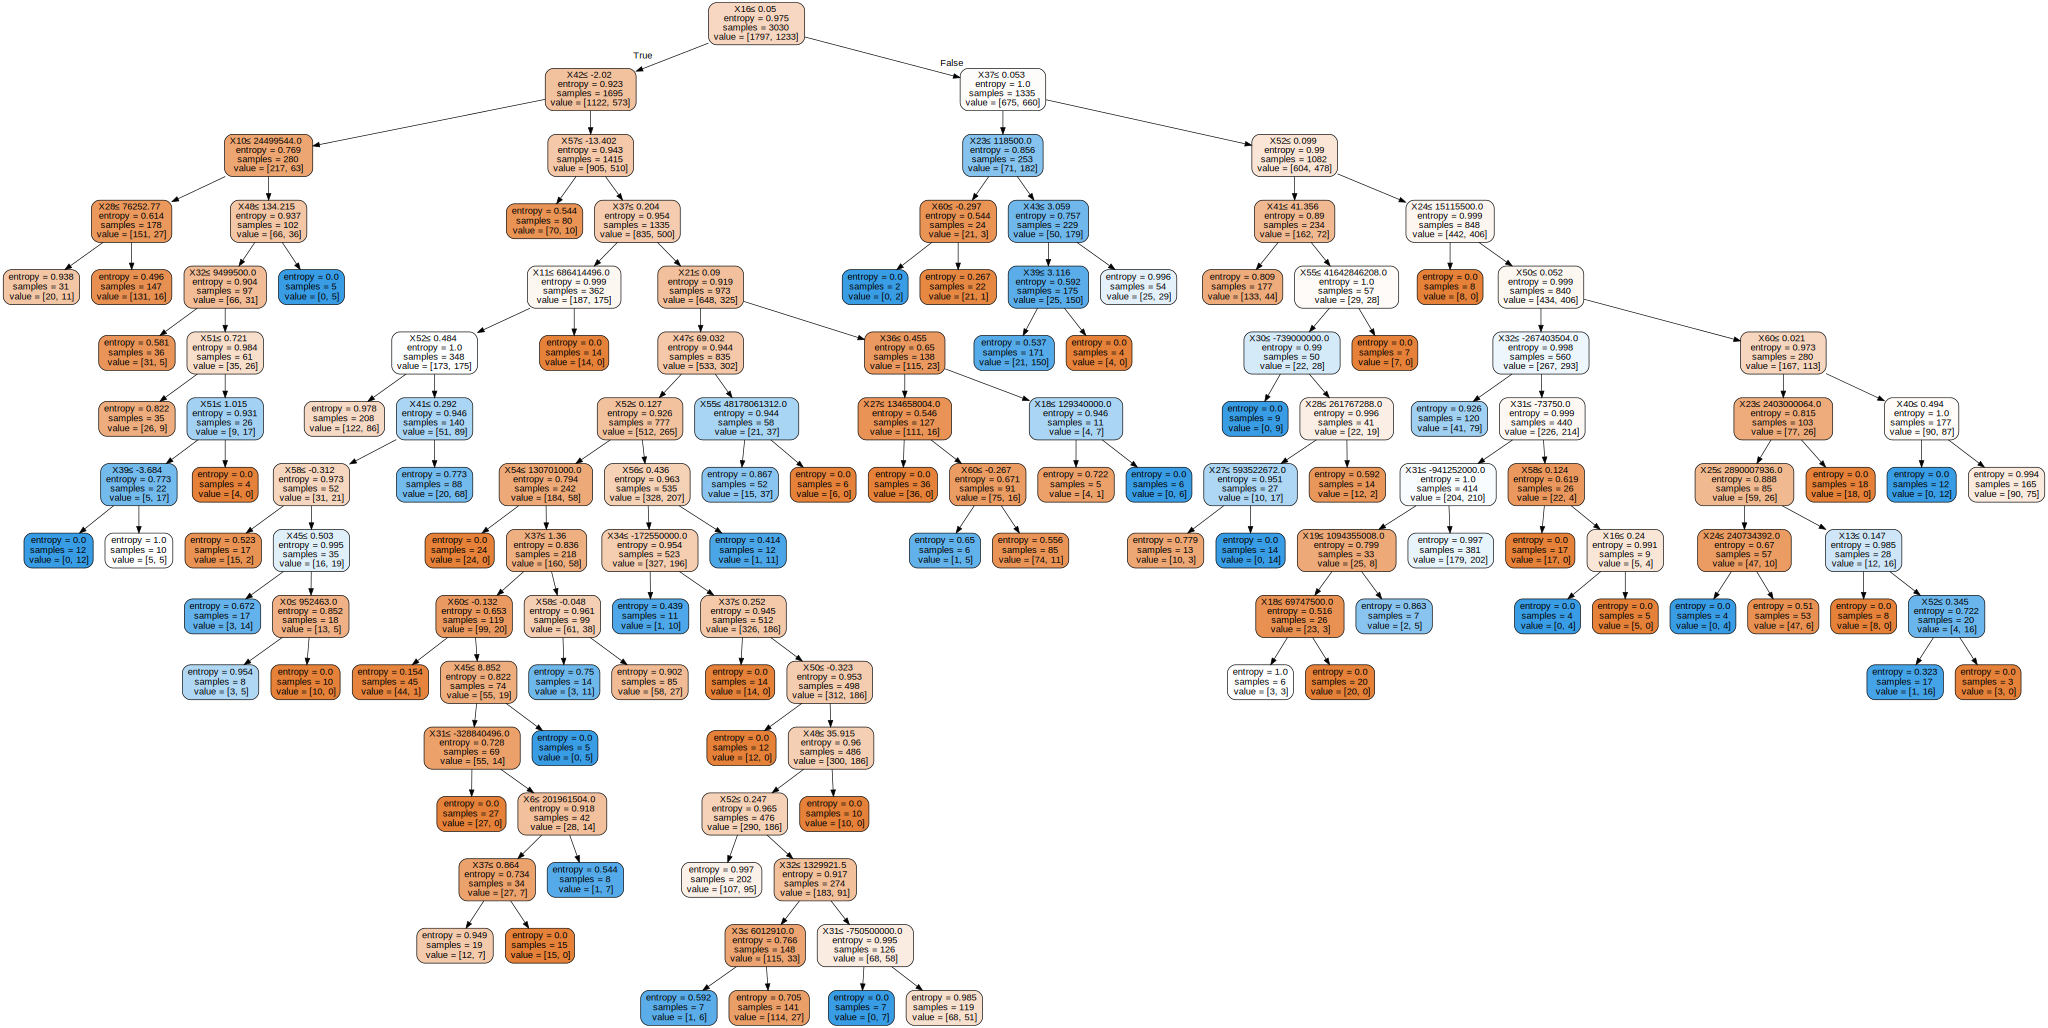

In [50]:
dot_data = tree.export_graphviz(DTC_GS.best_estimator_, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [51]:
print('The parameters combination that would give best accuracy is : ')
print(DTC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 70}


In [52]:
resultsDF = resultsDF.sort_values(by = ["Precision"], ascending = False)
print("Ranked by Precision")
resultsDF

Ranked by Precision


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Decision Tree Classifier RUN 1 With Scoring method accuracy,0.674690,0.552576,0.494154,0.631683,0.625330
SVM NON Linear RUN 3 With Scoring method recall,0.654704,0.547047,0.491943,0.163869,0.135762
Decision Tree Classifier RUN 2 With Scoring method precision,0.626307,0.551595,0.507980,0.689266,0.630952
KNN RUN 1 With Scoring method precision,0.620248,0.578658,0.564991,0.636054,0.594595
SVM NON Linear RUN 3 With Scoring method precision,0.617537,0.534076,0.465132,0.765432,0.637931
KNN RUN 2 With Scoring method accuracy,0.617087,0.576810,0.553710,0.686799,0.609499
SVM NON Linear RUN 2 With Scoring method f1,0.615919,0.532780,0.466125,0.287031,0.190736
KNN RUN 1 With Scoring method accuracy,0.611479,0.583688,0.579709,0.680198,0.643799
Decision Tree Classifier RUN 2 With Scoring method accuracy,0.606637,0.575475,0.567180,0.701320,0.635884


In [53]:
resultsDF = resultsDF.sort_values(by = ["Recall"], ascending = False)
print("Ranked by Recall")
resultsDF

Ranked by Recall


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
KNN RUN 2 With Scoring method recall,0.596878,0.590923,0.591082,0.714980,0.459119
Decision Tree Classifier RUN 2 With Scoring method recall,0.599493,0.589502,0.588786,0.548023,0.426752
Decision Tree Classifier RUN 1 With Scoring method f1,0.592525,0.584136,0.582809,0.544304,0.482639
KNN RUN 1 With Scoring method accuracy,0.611479,0.583688,0.579709,0.680198,0.643799
KNN RUN 1 With Scoring method precision,0.620248,0.578658,0.564991,0.636054,0.594595
Decision Tree Classifier RUN 3 With Scoring method f1,0.582113,0.577319,0.577098,0.643045,0.483926
KNN RUN 2 With Scoring method accuracy,0.617087,0.576810,0.553710,0.686799,0.609499
KNN RUN 1 With Scoring method f1,0.578882,0.576103,0.576636,0.727349,0.479452
Decision Tree Classifier RUN 2 With Scoring method accuracy,0.606637,0.575475,0.567180,0.701320,0.635884


In [54]:
resultsDF = resultsDF.sort_values(by = ["Fscore"], ascending = False)
print("Ranked by F Measure")
resultsDF

Ranked by F Measure


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
KNN RUN 2 With Scoring method recall,0.596878,0.590923,0.591082,0.714980,0.459119
Decision Tree Classifier RUN 2 With Scoring method recall,0.599493,0.589502,0.588786,0.548023,0.426752
Decision Tree Classifier RUN 1 With Scoring method f1,0.592525,0.584136,0.582809,0.544304,0.482639
KNN RUN 1 With Scoring method accuracy,0.611479,0.583688,0.579709,0.680198,0.643799
Decision Tree Classifier RUN 3 With Scoring method f1,0.582113,0.577319,0.577098,0.643045,0.483926
KNN RUN 1 With Scoring method f1,0.578882,0.576103,0.576636,0.727349,0.479452
KNN RUN 3 With Scoring method f1,0.571298,0.571910,0.571552,0.730384,0.477157
KNN RUN 2 With Scoring method f1,0.574245,0.571951,0.571450,0.731558,0.509259
Decision Tree Classifier RUN 2 With Scoring method accuracy,0.606637,0.575475,0.567180,0.701320,0.635884


In [55]:
resultsDF = resultsDF.sort_values(by = ["Train score"], ascending = False)
print("Ranked by Train score")
resultsDF

Ranked by Train score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Gaussian Naive Bayes RUN 1 With Scoring method recall,0.582854,0.539236,0.415677,0.888712,0.918644
Gaussian Naive Bayes RUN 2 With Scoring method recall,0.542192,0.521457,0.400995,0.885103,0.886598
Gaussian Naive Bayes RUN 3 With Scoring method recall,0.557445,0.529272,0.434273,0.884176,0.886850
SVM NON Linear RUN 1 With Scoring method precision,0.586042,0.528655,0.467840,0.785185,0.567164
SVM NON Linear RUN 3 With Scoring method precision,0.617537,0.534076,0.465132,0.765432,0.637931
SVM NON Linear RUN 2 With Scoring method precision,0.566981,0.517917,0.449455,0.746988,0.519231
KNN RUN 2 With Scoring method f1,0.574245,0.571951,0.571450,0.731558,0.509259
KNN RUN 3 With Scoring method f1,0.571298,0.571910,0.571552,0.730384,0.477157
KNN RUN 1 With Scoring method f1,0.578882,0.576103,0.576636,0.727349,0.479452


In [56]:
resultsDF = resultsDF.sort_values(by = ["Test score"], ascending = False)
print("Ranked by Test score")
resultsDF

Ranked by Test score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Gaussian Naive Bayes RUN 1 With Scoring method recall,0.582854,0.539236,0.415677,0.888712,0.918644
Gaussian Naive Bayes RUN 3 With Scoring method recall,0.557445,0.529272,0.434273,0.884176,0.886850
Gaussian Naive Bayes RUN 2 With Scoring method recall,0.542192,0.521457,0.400995,0.885103,0.886598
KNN RUN 1 With Scoring method accuracy,0.611479,0.583688,0.579709,0.680198,0.643799
SVM NON Linear RUN 3 With Scoring method precision,0.617537,0.534076,0.465132,0.765432,0.637931
Decision Tree Classifier RUN 2 With Scoring method accuracy,0.606637,0.575475,0.567180,0.701320,0.635884
Decision Tree Classifier RUN 2 With Scoring method precision,0.626307,0.551595,0.507980,0.689266,0.630952
Decision Tree Classifier RUN 1 With Scoring method accuracy,0.674690,0.552576,0.494154,0.631683,0.625330
SVM NON Linear RUN 3 With Scoring method accuracy,0.596107,0.533411,0.482175,0.640264,0.621372
